In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
sns.set()
salaryData = pd.read_csv('Salary_Data.csv')

In [3]:
x = np.array(salaryData['YearsExperience'].tolist())
y = np.array(salaryData['Salary'].tolist())

In [4]:
np.corrcoef (x, y)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [5]:
data = {'x': x, 'y':y}
df = pd.DataFrame(data)
df

,x,y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
df.describe()

,x,y
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df['x'].median()

4.7

In [8]:
df['x'].std()

2.8378881576627184

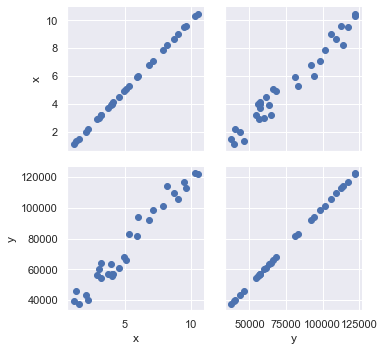

In [9]:
pair_grid_plot = sns.PairGrid(df)
pair_grid_plot.map(plt.scatter)

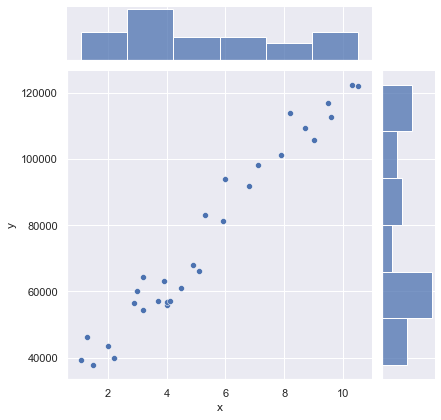

In [10]:
# Распределение x и y
sns.jointplot(x = 'x', y = 'y', data = df)

<AxesSubplot:xlabel='x', ylabel='Count'>

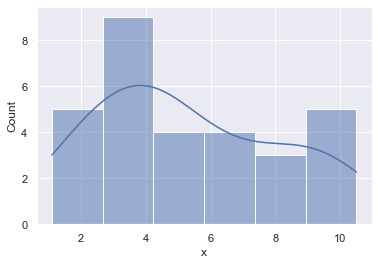

In [11]:
sns.histplot(x=df['x'], kde=True)

<AxesSubplot:xlabel='y', ylabel='Count'>

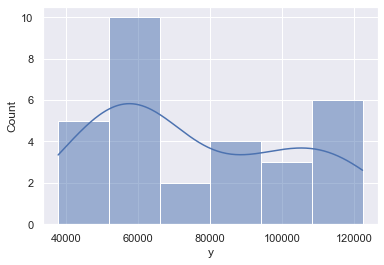

In [12]:
sns.histplot(x=df['y'], kde=True)

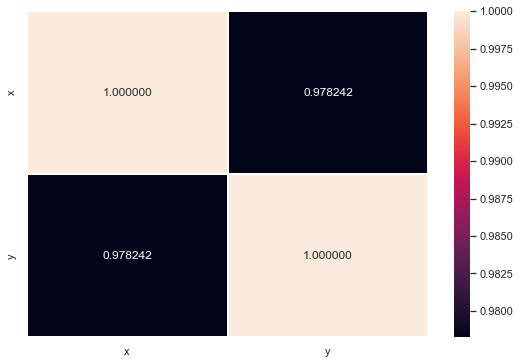

In [13]:
# Корреляция
corr = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidths=1.5, fmt='.6f', ax=ax)
plt.show()

In [14]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [16]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [17]:
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [18]:
regressor.coef_

array([9449.96232146])

In [19]:
regressor.intercept_

25792.200198668717

Уравнение регрессии: $$y=ax+b,$$
где $a$=coef_, $b$=intercept_, $x$ - независимая переменная, $y$ - зависимая переменная

In [20]:
'y = {0}*x + {1}'.format(regressor.coef_[0], regressor.intercept_)

'y = 9449.962321455072*x + 25792.200198668717'

In [21]:
# Прогноз
regressor.predict([[12.5]])

array([143916.72921686])

In [22]:
# Прогноз x_max + 2
regressor.predict([[df.x.max()+2]])

array([143916.72921686])

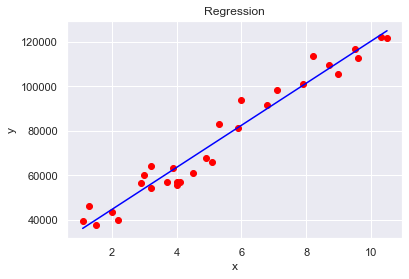

In [23]:
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()